# Car Price Prediction

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Dataset

In [2]:
data = pd.read_csv('data/car_prediction_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.shape

(301, 9)

# Data Preprocessing

In [5]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(2)

In [7]:
data=data.drop_duplicates()

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
121,Royal Enfield Thunder 350,2011,1.05,1.50,6900,Petrol,Individual,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
290,amaze,2014,4.50,6.40,19000,Petrol,Dealer,Manual,0
173,Activa 4g,2017,0.40,0.51,1300,Petrol,Individual,Automatic,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
132,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0
107,Royal Enfield Thunder 350,2013,1.25,1.50,15000,Petrol,Individual,Manual,0
71,corolla altis,2011,4.50,12.48,45000,Diesel,Dealer,Manual,0


In [10]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

# Exploratory Data Analysis

<Axes: >

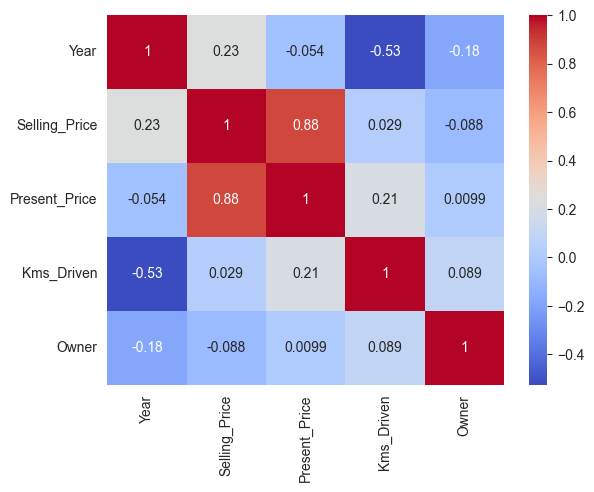

In [11]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

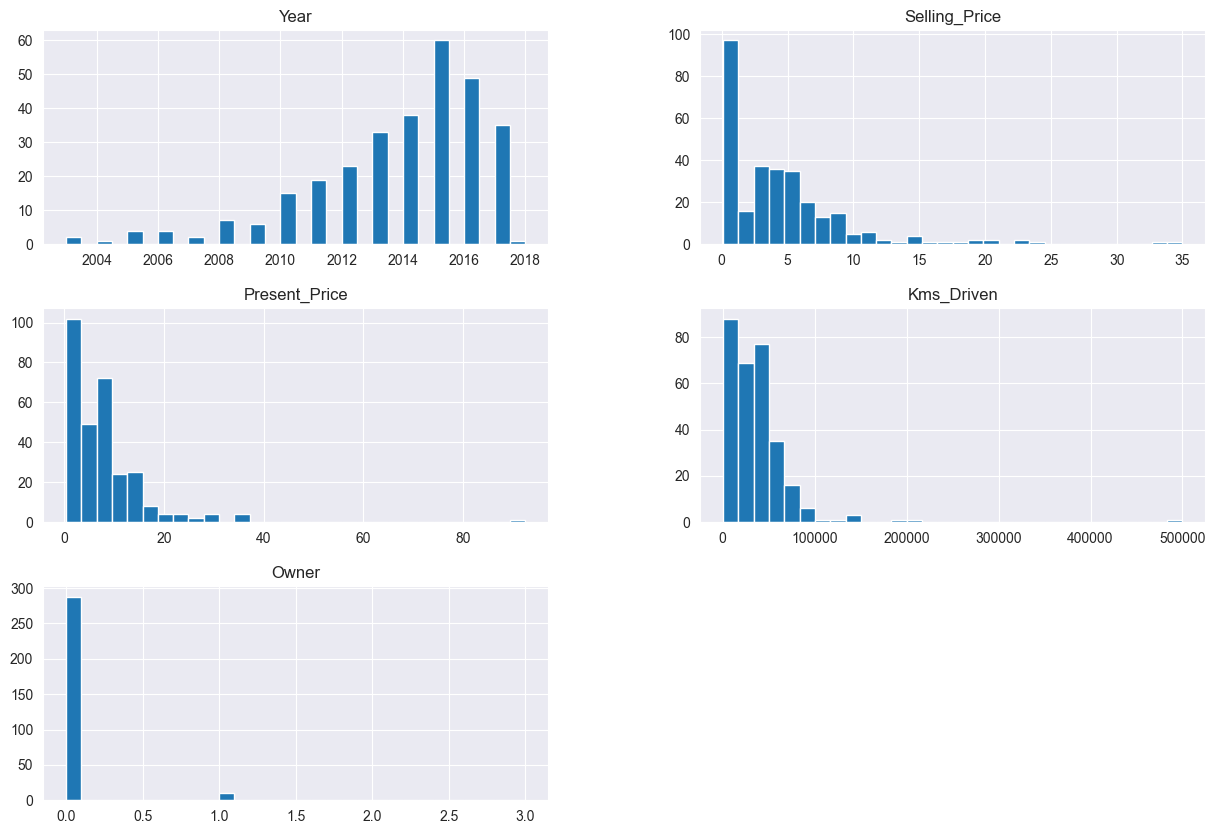

In [12]:
data.hist(bins=30, figsize=(15,10))

# Feature Engineering

In [13]:
data['Age'] = 2025 - data['Year']

In [14]:
data = data.drop('Car_Name', axis=1)
data = data.drop('Year', axis=1)

In [15]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


# Encoding Categorical Variables

In [16]:
x=data.drop('Selling_Price', axis=1)
y=data['Selling_Price']

In [17]:
x.dtypes

Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
Age                int64
dtype: object

In [18]:
x = pd.get_dummies(
    x,
    columns=['Fuel_Type', 'Seller_Type', 'Transmission'],
)

In [19]:
x.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,11,False,False,True,True,False,False,True
1,9.54,43000,0,12,False,True,False,True,False,False,True
2,9.85,6900,0,8,False,False,True,True,False,False,True
3,4.15,5200,0,14,False,False,True,True,False,False,True
4,6.87,42450,0,11,False,True,False,True,False,False,True


In [20]:
x.dtypes

Present_Price             float64
Kms_Driven                  int64
Owner                       int64
Age                         int64
Fuel_Type_CNG                bool
Fuel_Type_Diesel             bool
Fuel_Type_Petrol             bool
Seller_Type_Dealer           bool
Seller_Type_Individual       bool
Transmission_Automatic       bool
Transmission_Manual          bool
dtype: object

# Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Feature Scaling

In [23]:

numeric_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[numeric_features] = scaler.fit_transform(x_train[numeric_features])
x_test[numeric_features] = scaler.transform(x_test[numeric_features])
x_train.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
6,0.079231,-0.556094,-0.173702,-0.463102,False,False,True,True,False,False,True
185,-0.775916,-1.156000,-0.173702,1.973282,False,False,True,False,True,True,False
187,-0.783855,-0.087276,-0.173702,0.233008,False,False,True,False,True,False,True
148,-0.735086,0.374300,-0.173702,1.277172,False,False,True,False,True,False,True
31,-0.287098,0.700953,-0.173702,0.929117,False,False,True,True,False,False,True


# Model Building

In [24]:
x_train

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
6,0.079231,-0.556094,-0.173702,-0.463102,False,False,True,True,False,False,True
185,-0.775916,-1.156000,-0.173702,1.973282,False,False,True,False,True,True,False
187,-0.783855,-0.087276,-0.173702,0.233008,False,False,True,False,True,False,True
148,-0.735086,0.374300,-0.173702,1.277172,False,False,True,False,True,False,True
31,-0.287098,0.700953,-0.173702,0.929117,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
190,-0.756635,0.906887,-0.173702,1.973282,False,False,True,False,True,False,True
72,1.268950,0.764899,-0.173702,0.233008,False,False,True,True,False,False,True
108,-0.671574,-0.584357,-0.173702,-0.811157,False,False,True,False,True,False,True
272,0.292450,-0.243501,-0.173702,-0.463102,False,False,True,True,False,False,True


In [25]:
y_test

283     8.99
267     8.35
166     0.45
9       7.45
78      5.25
280     5.25
95      5.85
111     1.15
5       9.25
175     0.38
99      9.65
197     0.16
186     0.25
156     0.48
58      4.10
61      4.50
149     0.51
110     1.20
64     33.00
142     0.60
157     0.48
106     1.35
249     5.25
47      1.05
43      5.50
277     9.70
282     8.25
118     1.10
215     4.50
238     4.80
18      3.25
241     4.75
34      5.50
25      3.00
46      2.65
7       6.50
115     1.11
196     0.17
113     1.15
94      4.00
76      5.50
83     12.50
120     1.05
77      1.50
131     0.75
199     0.12
212    11.25
290     4.50
221     4.50
180     0.30
146     0.55
188     0.25
85      2.50
250    12.90
279     6.25
74      4.90
246     3.75
26      4.15
211    11.75
60      6.95
Name: Selling_Price, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
model.score(x_test, y_test)

0.7528154215832931

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
rf_model.score(x_test, y_test)

0.5288249930893064

In [30]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
xgb_model.score(x_test, y_test)

0.7715052348861519